In [3]:
import pandas as pd 
import numpy  as np
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("data_set.csv")
df

,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,...,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10001,CUST8451,SRV001,2024-07-19,Paid,Anomaly,Sale,Net Banking,Salt (1kg),No Service,...,0.05,0,0,Online,CASH010,SUP195,07:57:26,New,Phone,Missing Charges
1,INV10002,CUST8861,SRV002,2023-12-17,Paid,No Leakage,Sale,Credit Card,Tea Powder (250g),Standard Delivery,...,0.05,40,0,Branch B,CASH011,SUP143,16:09:25,Premium,In-Store,NaN
2,INV10003,CUST3978,SRV005,2023-11-09,Failed,No Leakage,Sale,Cash,Dishwash Soap (500ml),Installation Service,...,0.12,500,0,Online,CASH004,SUP120,05:49:59,Wholesale,Phone,NaN
3,INV10004,CUST2326,SRV005,2024-09-03,Pending,Anomaly,Return,UPI,Tea Powder (250g),Installation Service,...,0.12,500,0,Main Store,CASH013,SUP180,16:59:38,Wholesale,Phone,Usage Mismatch
4,INV10005,CUST1801,SRV005,2024-03-03,Failed,No Leakage,Return,Debit Card,Detergent (1kg),Installation Service,...,0.18,500,0,Branch A,CASH016,SUP181,13:13:22,New,Online,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,INV19996,CUST1117,SRV005,2023-04-05,Failed,No Leakage,Return,Debit Card,Wheat Flour (1kg),Installation Service,...,0.18,500,0,Branch B,CASH004,SUP105,03:35:12,Wholesale,Online,NaN
9996,INV19997,CUST2855,SRV004,2023-03-24,Paid,Anomaly,Sale,Cheque,Cooking Oil (1L),Consultation Service,...,0.23,300,0,Branch A,CASH020,SUP179,12:33:57,Regular,In-Store,Incorrect Rates
9997,INV19998,CUST5305,SRV001,2023-02-01,Paid,No Leakage,Sale,Credit Card,Coffee Powder (200g),No Service,...,0.05,0,0,Online,CASH015,SUP172,16:05:21,Premium,In-Store,NaN
9998,INV19999,CUST3492,SRV004,2023-12-09,Failed,Anomaly,Return,Cheque,Butter (100g),Consultation Service,...,0.12,300,0,Branch A,CASH015,SUP116,23:58:48,Premium,Phone,Payment Status Mismatch


In [4]:
df.columns

Index(['Invoice_Number', 'Customer_ID', 'Service_ID', 'Billing_Date',
       'Payment_Status', 'Leakage_Flag', 'Transaction_Type', 'Mode_of_Payment',
       'Product_Name', 'Service', 'Product_Category', 'Service_Category',
       'Product_Quantity', 'Tax_Amount', 'Actual_Amount', 'Billed_Amount',
       'Paid_Amount', 'Balance_Amount', 'Unit_Price', 'Tax_Rate',
       'Service_Charge', 'Discount_Amount', 'Store_Branch', 'Cashier_ID',
       'Supplier_ID', 'Billing_Time', 'Customer_Type', 'Order_Channel',
       'Anomaly_Type'],
      dtype='object')

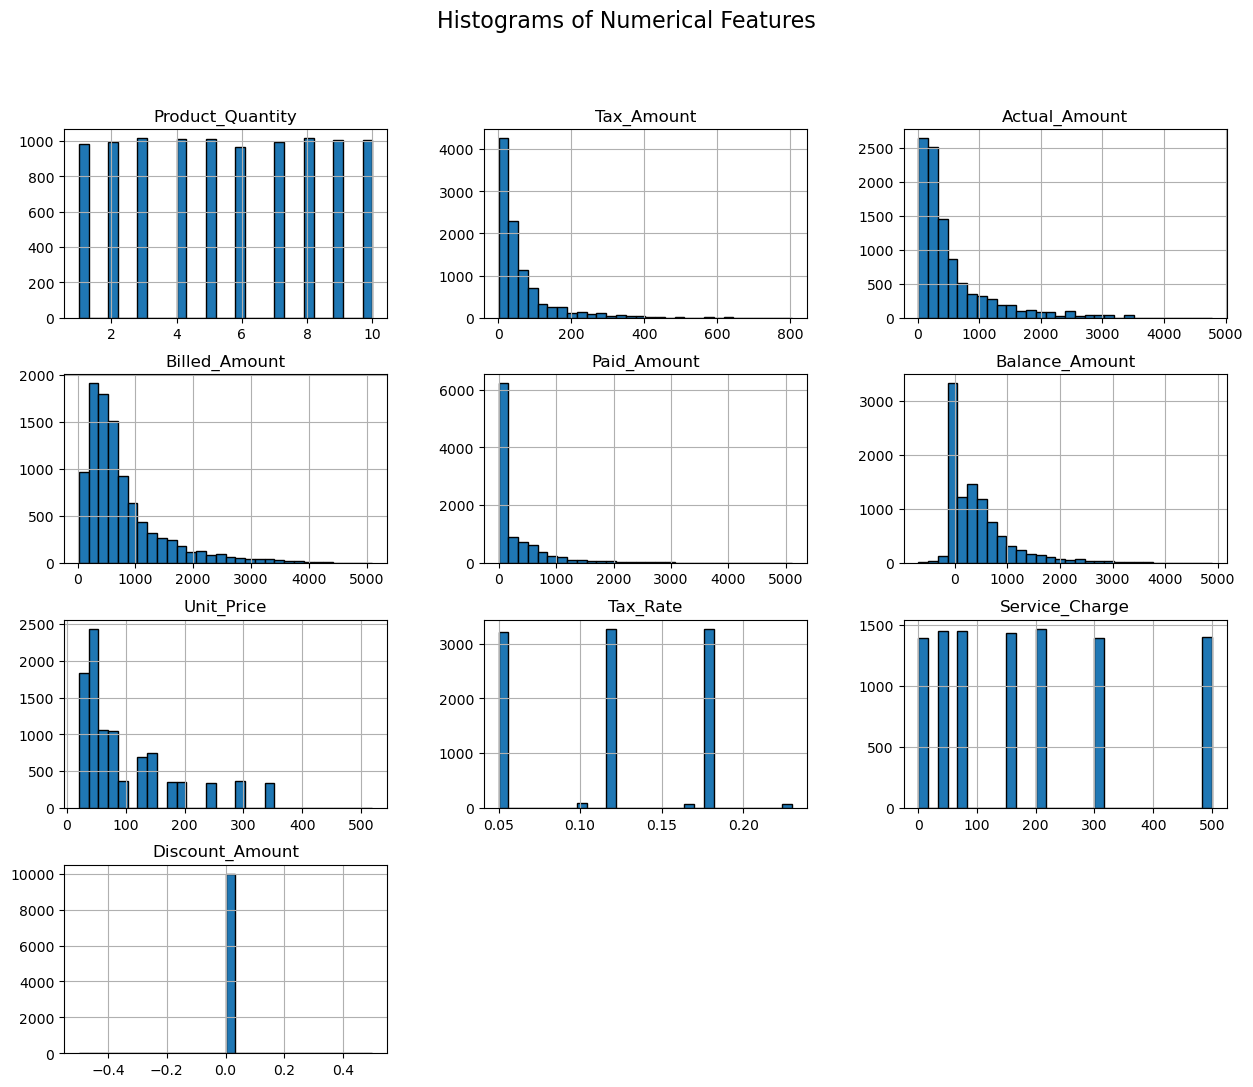

In [5]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64','int64']).columns

df[num_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


In [6]:
df['Discount_Amount'].nunique()

1

In [7]:
df['Anomaly_Type'].unique()

array(['Missing Charges', nan, 'Usage Mismatch', 'Excess Payment',
       'Incorrect Rates', 'Unrecorded Discounts', 'Duplicate Entries',
       'Under Payment', 'Payment Status Mismatch'], dtype=object)

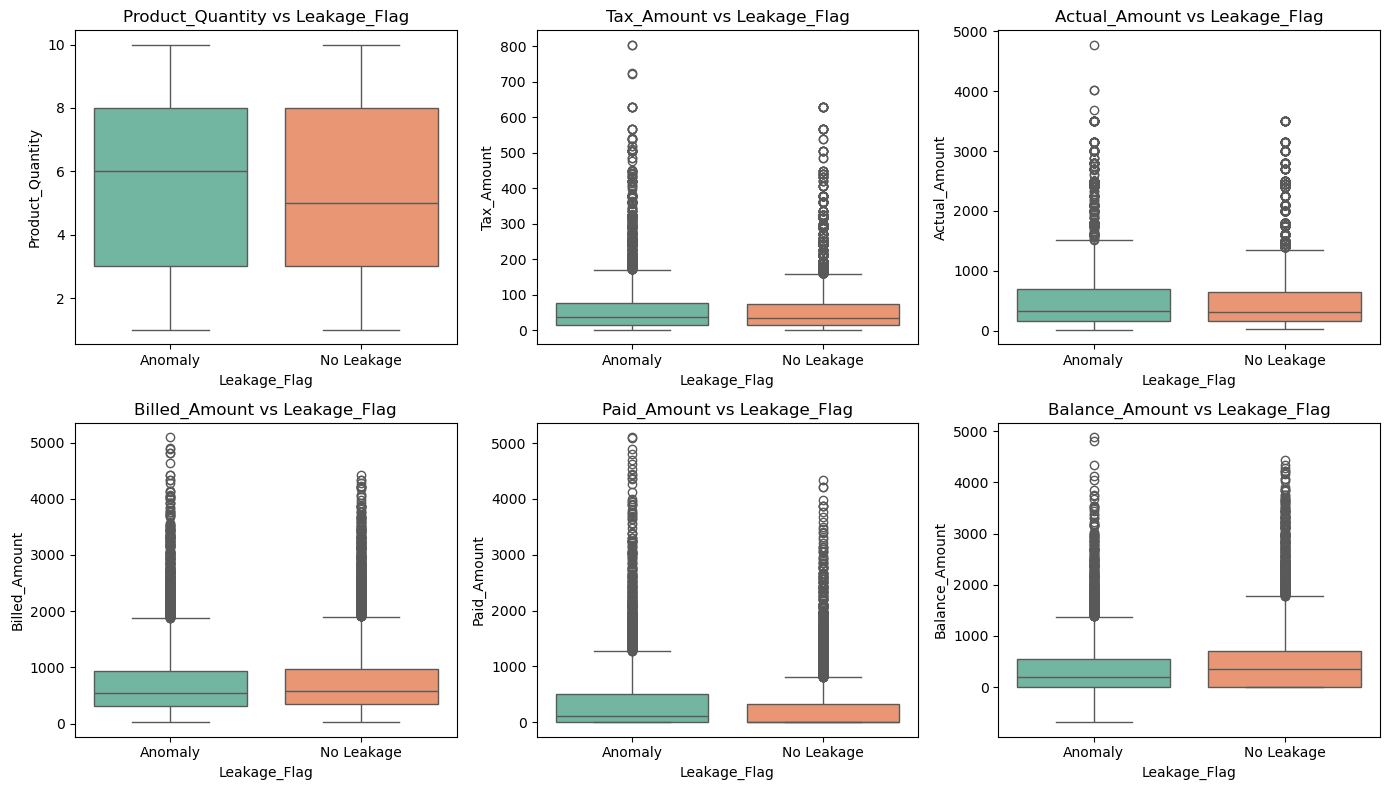

In [8]:
import seaborn as sns

plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols[:6], 1):  # first 6 numeric features
    plt.subplot(2, 3, i)
    sns.boxplot(x="Leakage_Flag", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Leakage_Flag")
plt.tight_layout()
plt.show()


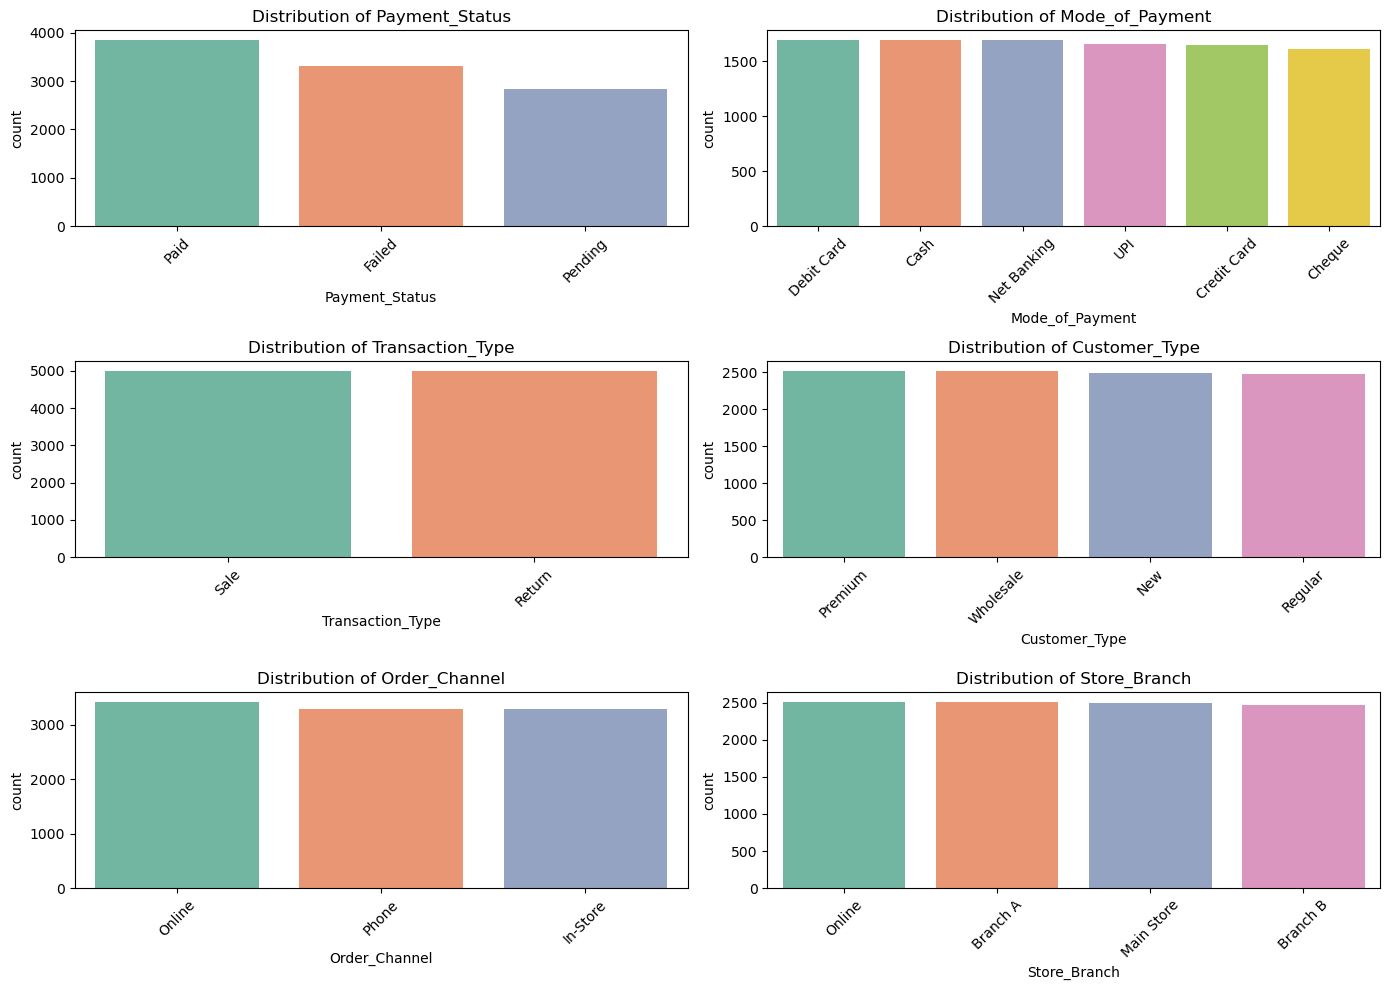

In [9]:
cat_cols = ['Payment_Status', 'Mode_of_Payment', 'Transaction_Type',
            'Customer_Type', 'Order_Channel', 'Store_Branch']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, palette="Set2", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


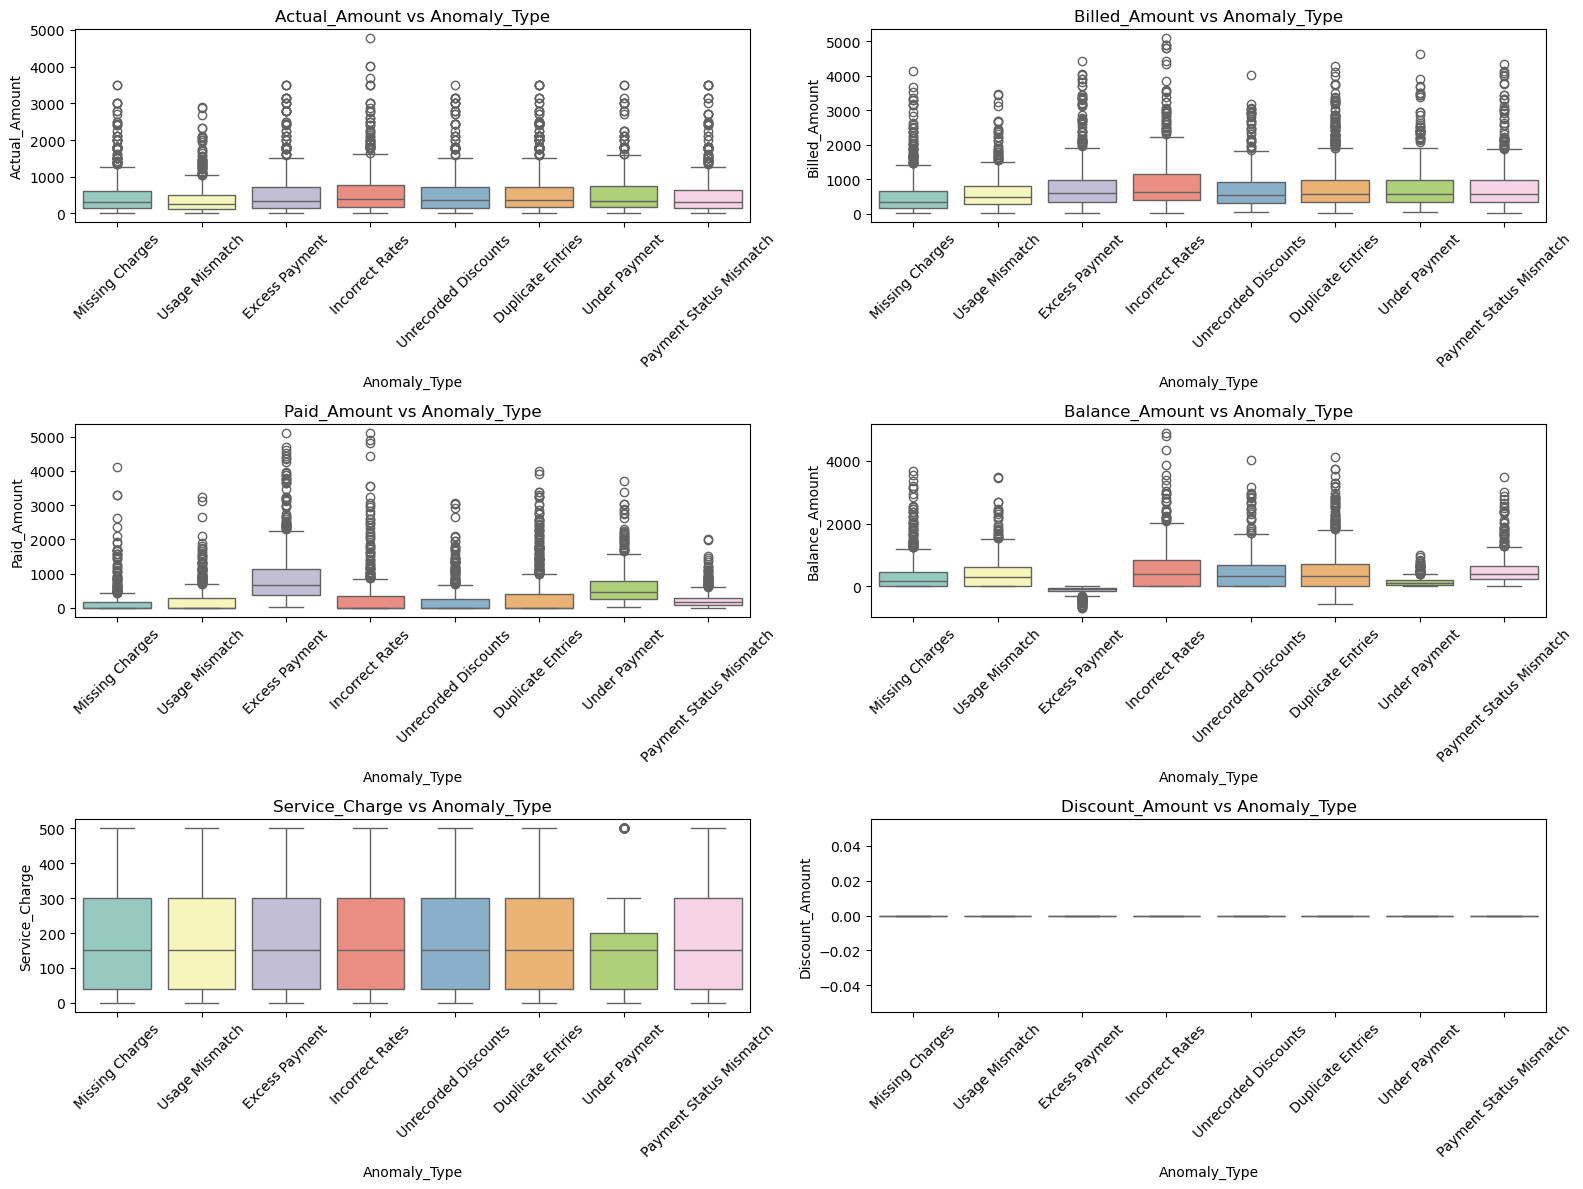

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = ['Actual_Amount', 'Billed_Amount', 'Paid_Amount', 
            'Balance_Amount', 'Service_Charge', 'Discount_Amount']

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="Anomaly_Type", y=col, data=df, palette="Set3")
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Anomaly_Type")

plt.tight_layout()
plt.show()


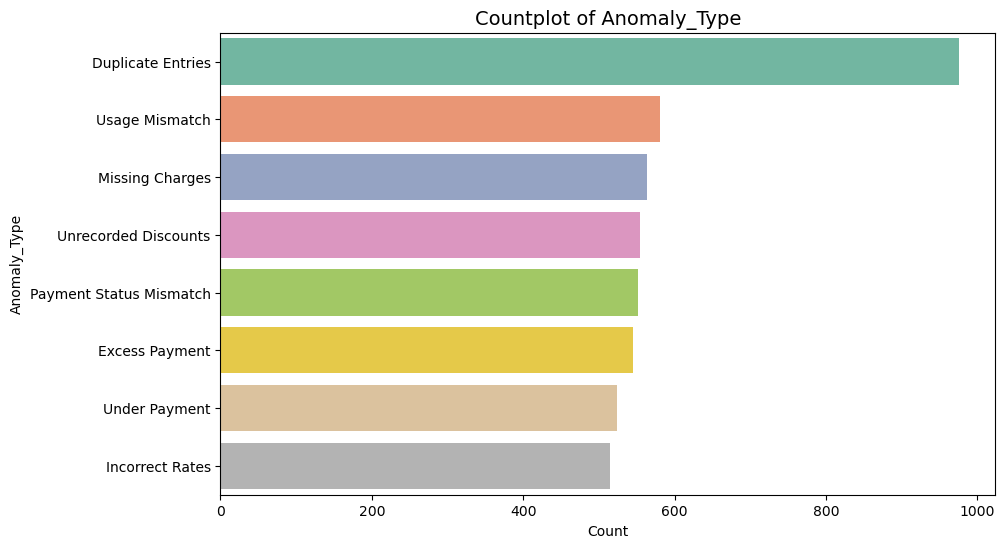

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(
    y="Anomaly_Type",
    data=df,
    order=df['Anomaly_Type'].value_counts().index,
    palette="Set2"
)
plt.title("Countplot of Anomaly_Type", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Anomaly_Type")
plt.show()

In [12]:
df.head()

,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,...,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10001,CUST8451,SRV001,2024-07-19,Paid,Anomaly,Sale,Net Banking,Salt (1kg),No Service,...,0.05,0,0,Online,CASH010,SUP195,07:57:26,New,Phone,Missing Charges
1,INV10002,CUST8861,SRV002,2023-12-17,Paid,No Leakage,Sale,Credit Card,Tea Powder (250g),Standard Delivery,...,0.05,40,0,Branch B,CASH011,SUP143,16:09:25,Premium,In-Store,NaN
2,INV10003,CUST3978,SRV005,2023-11-09,Failed,No Leakage,Sale,Cash,Dishwash Soap (500ml),Installation Service,...,0.12,500,0,Online,CASH004,SUP120,05:49:59,Wholesale,Phone,NaN
3,INV10004,CUST2326,SRV005,2024-09-03,Pending,Anomaly,Return,UPI,Tea Powder (250g),Installation Service,...,0.12,500,0,Main Store,CASH013,SUP180,16:59:38,Wholesale,Phone,Usage Mismatch
4,INV10005,CUST1801,SRV005,2024-03-03,Failed,No Leakage,Return,Debit Card,Detergent (1kg),Installation Service,...,0.18,500,0,Branch A,CASH016,SUP181,13:13:22,New,Online,NaN


In [13]:
df['Service'].unique()

array(['No Service', 'Standard Delivery', 'Installation Service',
       'Customization Service', 'Bulk Order Service', 'Express Delivery',
       'Consultation Service'], dtype=object)

In [15]:
# Loop through each unique value in Service column and display rows
unique_services = df['Service'].unique()
pd.set_option('display.max_columns', None)

for service in unique_services:
    print(f"\n===== Rows for Service: {service} =====\n")
    display(df[df['Service'] == service].head())  # show first few rows for each service



===== Rows for Service: No Service =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10001,CUST8451,SRV001,2024-07-19,Paid,Anomaly,Sale,Net Banking,Salt (1kg),No Service,Pantry Staples,NaN,5,5.0,100.0,105.0,105.000000,0.000000,20.0,0.05,0,0,Online,CASH010,SUP195,07:57:26,New,Phone,Missing Charges
8,INV10009,CUST4895,SRV001,2023-01-13,Paid,Anomaly,Return,UPI,Bananas (1kg),No Service,Fruits,NaN,4,10.0,200.0,210.0,248.658291,-38.658291,50.0,0.05,0,0,Online,CASH011,SUP109,18:52:28,Regular,Online,Excess Payment
20,INV10021,CUST7872,SRV001,2024-08-19,Paid,Anomaly,Sale,Credit Card,Milk (1L),No Service,Dairy & Eggs,NaN,3,9.0,180.0,189.0,189.000000,0.000000,60.0,0.05,0,0,Main Store,CASH001,SUP102,17:47:26,New,Phone,Duplicate Entries
30,INV10031,CUST3570,SRV001,2023-11-24,Paid,Anomaly,Return,Credit Card,Fish (1kg),No Service,Meat & Fish,NaN,9,324.0,2700.0,3024.0,3024.000000,0.000000,300.0,0.12,0,0,Online,CASH004,SUP115,18:39:27,New,Online,Duplicate Entries
32,INV10033,CUST6461,SRV001,2024-09-13,Paid,No Leakage,Sale,Net Banking,Apples (1kg),No Service,Fruits,NaN,9,194.4,1080.0,1274.4,1274.400000,0.000000,120.0,0.18,0,0,Branch B,CASH019,SUP161,10:19:07,New,In-Store,NaN



===== Rows for Service: Standard Delivery =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
1,INV10002,CUST8861,SRV002,2023-12-17,Paid,No Leakage,Sale,Credit Card,Tea Powder (250g),Standard Delivery,Beverages,Delivery Services,4,24.000000,480.000000,544.000000,544.0,0.000000,120.0,0.05,40,0,Branch B,CASH011,SUP143,16:09:25,Premium,In-Store,NaN
10,INV10011,CUST1451,SRV002,2023-10-11,Pending,Anomaly,Return,UPI,Tomatoes (1kg),Standard Delivery,Fresh Vegetables,Delivery Services,3,2.844813,56.896258,99.741071,0.0,99.741071,30.0,0.05,40,0,Online,CASH007,SUP107,00:59:12,Regular,Online,Usage Mismatch
14,INV10015,CUST4807,SRV002,2024-08-05,Failed,Anomaly,Return,Cash,Oranges (1kg),Standard Delivery,Fruits,Delivery Services,8,64.000000,640.000000,744.000000,0.0,744.000000,80.0,0.10,40,0,Main Store,CASH012,SUP132,14:30:01,Regular,In-Store,Incorrect Rates
18,INV10019,CUST7397,SRV002,2024-02-12,Paid,No Leakage,Return,Debit Card,Lentils (1kg),Standard Delivery,Grains & Cereals,Delivery Services,9,162.000000,900.000000,1102.000000,1102.0,0.000000,100.0,0.18,40,0,Online,CASH013,SUP160,19:03:48,Wholesale,Phone,NaN
28,INV10029,CUST8630,SRV002,2023-12-20,Failed,Anomaly,Return,Net Banking,Rice (1kg),Standard Delivery,Grains & Cereals,Delivery Services,4,12.000000,240.000000,252.000000,0.0,252.000000,60.0,0.05,40,0,Main Store,CASH010,SUP126,02:44:09,Premium,Online,Missing Charges



===== Rows for Service: Installation Service =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
2,INV10003,CUST3978,SRV005,2023-11-09,Failed,No Leakage,Sale,Cash,Dishwash Soap (500ml),Installation Service,Household,Technical Services,5,48.000000,400.000000,948.000000,0.0,948.000000,80.0,0.12,500,0,Online,CASH004,SUP120,05:49:59,Wholesale,Phone,NaN
3,INV10004,CUST2326,SRV005,2024-09-03,Pending,Anomaly,Return,UPI,Tea Powder (250g),Installation Service,Beverages,Technical Services,6,56.066571,467.221422,1023.287992,0.0,1023.287992,120.0,0.12,500,0,Main Store,CASH013,SUP180,16:59:38,Wholesale,Phone,Usage Mismatch
4,INV10005,CUST1801,SRV005,2024-03-03,Failed,No Leakage,Return,Debit Card,Detergent (1kg),Installation Service,Household,Technical Services,4,144.000000,800.000000,1444.000000,0.0,1444.000000,200.0,0.18,500,0,Branch A,CASH016,SUP181,13:13:22,New,Online,NaN
9,INV10010,CUST7147,SRV005,2023-09-08,Paid,No Leakage,Sale,Credit Card,Lentils (1kg),Installation Service,Grains & Cereals,Technical Services,5,25.000000,500.000000,1025.000000,1025.0,0.000000,100.0,0.05,500,0,Branch B,CASH020,SUP177,13:19:35,Wholesale,Phone,NaN
25,INV10026,CUST3207,SRV005,2023-11-06,Paid,No Leakage,Return,Credit Card,Milk (1L),Installation Service,Dairy & Eggs,Technical Services,6,43.200000,360.000000,903.200000,903.2,0.000000,60.0,0.12,500,0,Branch A,CASH017,SUP160,22:23:44,Regular,Online,NaN



===== Rows for Service: Customization Service =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
5,INV10006,CUST1532,SRV007,2023-06-28,Pending,No Leakage,Sale,Net Banking,Tomatoes (1kg),Customization Service,Fresh Vegetables,Special Orders,4,14.400000,120.000000,334.400000,0.0,334.400000,30.0,0.12,200,0,Online,CASH019,SUP175,13:12:30,Wholesale,Online,NaN
16,INV10017,CUST8263,SRV007,2023-09-03,Pending,No Leakage,Return,Debit Card,Dishwash Soap (500ml),Customization Service,Household,Special Orders,4,57.600000,320.000000,577.600000,0.0,577.600000,80.0,0.18,200,0,Main Store,CASH003,SUP115,07:35:52,Premium,Online,NaN
19,INV10020,CUST3138,SRV007,2024-12-24,Pending,Anomaly,Return,Cheque,Salt (1kg),Customization Service,Pantry Staples,Special Orders,7,4.619888,92.397765,297.017653,0.0,297.017653,20.0,0.05,200,0,Branch B,CASH011,SUP185,22:42:00,Premium,In-Store,Usage Mismatch
21,INV10021,CUST3712,SRV007,2024-06-04,Paid,Anomaly,Sale,Credit Card,Rice (1kg),Customization Service,Grains & Cereals,Special Orders,10,30.000000,600.000000,830.000000,830.0,0.000000,60.0,0.05,200,0,Main Store,CASH007,SUP169,21:48:37,Regular,Phone,Duplicate Entries
26,INV10027,CUST6842,SRV007,2023-09-10,Paid,Anomaly,Return,Cheque,Toothpaste (150g),Customization Service,Personal Care,Special Orders,1,10.800000,60.000000,70.800000,70.8,0.000000,60.0,0.18,200,0,Online,CASH012,SUP114,09:01:42,New,Online,Missing Charges



===== Rows for Service: Bulk Order Service =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
6,INV10007,CUST1319,SRV006,2024-06-16,Pending,No Leakage,Sale,Cash,Rice (1kg),Bulk Order Service,Grains & Cereals,Special Orders,5,54.0,300.0,504.0,0.000000,504.000000,60.0,0.18,150,0,Branch B,CASH019,SUP139,19:03:45,Premium,In-Store,NaN
12,INV10013,CUST4931,SRV006,2023-01-31,Paid,Anomaly,Return,Cash,Wheat Flour (1kg),Bulk Order Service,Grains & Cereals,Special Orders,1,8.1,45.0,203.1,226.179434,-23.079434,45.0,0.18,150,0,Online,CASH020,SUP189,13:30:46,Wholesale,Phone,Excess Payment
22,INV10023,CUST2302,SRV006,2023-02-26,Pending,No Leakage,Sale,Debit Card,Coffee Powder (200g),Bulk Order Service,Beverages,Special Orders,4,168.0,1400.0,1718.0,0.000000,1718.000000,350.0,0.12,150,0,Branch A,CASH015,SUP197,11:36:27,Premium,In-Store,NaN
23,INV10024,CUST3675,SRV006,2024-06-29,Paid,Anomaly,Sale,Cheque,Tea Powder (250g),Bulk Order Service,Beverages,Special Orders,7,42.0,840.0,1032.0,1032.000000,0.000000,120.0,0.05,150,0,Online,CASH014,SUP137,19:53:50,New,Phone,Duplicate Entries
34,INV10035,CUST5080,SRV006,2024-12-23,Paid,Anomaly,Sale,Cash,Bread (500g),Bulk Order Service,Bakery,Special Orders,9,64.8,360.0,574.8,574.800000,0.000000,40.0,0.18,150,0,Online,CASH014,SUP108,02:26:52,Wholesale,Phone,Duplicate Entries



===== Rows for Service: Express Delivery =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
7,INV10008,CUST6820,SRV003,2024-05-23,Failed,No Leakage,Sale,Net Banking,Chips (100g),Express Delivery,Snacks,Delivery Services,1,3.600000,20.000000,103.600000,0.000000,103.600000,20.00000,0.18,80,0,Branch B,CASH009,SUP166,19:20:46,Regular,Phone,NaN
13,INV10014,CUST8666,SRV003,2023-11-08,Failed,No Leakage,Sale,UPI,Dishwash Soap (500ml),Express Delivery,Household,Delivery Services,3,43.200000,240.000000,363.200000,0.000000,363.200000,80.00000,0.18,80,0,Online,CASH003,SUP156,14:10:44,Wholesale,In-Store,NaN
27,INV10028,CUST4980,SRV003,2024-09-21,Failed,Anomaly,Return,Credit Card,Salt (1kg),Express Delivery,Pantry Staples,Delivery Services,6,12.000000,120.000000,212.000000,0.000000,212.000000,20.00000,0.10,80,0,Online,CASH018,SUP113,14:25:18,Wholesale,In-Store,Incorrect Rates
31,INV10031,CUST4268,SRV003,2024-02-10,Paid,Anomaly,Sale,Credit Card,Coffee Powder (200g),Express Delivery,Beverages,Delivery Services,1,17.500000,350.000000,369.685152,369.685152,0.000000,350.00000,0.05,80,0,Branch B,CASH002,SUP189,16:16:16,Premium,Online,Duplicate Entries
37,INV10038,CUST6775,SRV003,2023-12-02,Failed,Anomaly,Return,Cheque,Lentils (1kg),Express Delivery,Grains & Cereals,Delivery Services,3,77.167388,428.707709,585.875097,0.000000,585.875097,142.90257,0.18,80,0,Branch B,CASH015,SUP170,12:59:00,Wholesale,Phone,Incorrect Rates



===== Rows for Service: Consultation Service =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
11,INV10012,CUST4898,SRV004,2024-12-28,Failed,No Leakage,Sale,Cheque,Wheat Flour (1kg),Consultation Service,Grains & Cereals,Advisory Services,6,48.6,270.0,618.600000,0.0,618.600000,45.0,0.18,300,0,Online,CASH011,SUP165,01:42:55,Regular,Phone,NaN
15,INV10016,CUST4212,SRV004,2024-02-13,Paid,No Leakage,Return,Cash,Cooking Oil (1L),Consultation Service,Pantry Staples,Advisory Services,5,90.0,750.0,1140.000000,1140.0,0.000000,150.0,0.12,300,0,Online,CASH018,SUP135,20:15:53,New,Phone,NaN
17,INV10018,CUST2269,SRV004,2023-09-03,Pending,Anomaly,Return,Net Banking,Sugar (1kg),Consultation Service,Pantry Staples,Advisory Services,10,54.0,450.0,721.020935,0.0,721.020935,45.0,0.12,300,0,Online,CASH017,SUP161,10:31:29,Regular,Online,Unrecorded Discounts
24,INV10024,CUST8492,SRV004,2024-03-09,Paid,Anomaly,Sale,Credit Card,Bananas (1kg),Consultation Service,Fruits,Advisory Services,8,48.0,400.0,748.000000,748.0,0.000000,50.0,0.12,300,0,Online,CASH007,SUP160,16:12:34,Regular,In-Store,Duplicate Entries
35,INV10035,CUST1715,SRV004,2024-08-22,Pending,Anomaly,Sale,UPI,Bread (500g),Consultation Service,Bakery,Advisory Services,10,48.0,400.0,448.000000,0.0,448.000000,40.0,0.12,300,0,Branch B,CASH020,SUP178,14:22:09,New,Phone,Duplicate Entries


In [ ]:
# Loop through each unique value in Service column and display rows
unique_services = df['Anomaly_Type'].unique()
pd.set_option('display.max_columns', None)

for service in unique_services:
    print(f"\n===== Rows for Service: {service} =====\n")
    display(df[df['Anomaly_Type'] == service].head())  # show first few rows for each service



===== Rows for Service: Missing Charges =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10001,CUST8451,SRV001,2024-07-19,Paid,Anomaly,Sale,Net Banking,Salt (1kg),No Service,Pantry Staples,NaN,5,5.0,100.0,105.0,105.0,0.0,20.0,0.05,0,0,Online,CASH010,SUP195,07:57:26,New,Phone,Missing Charges
26,INV10027,CUST6842,SRV007,2023-09-10,Paid,Anomaly,Return,Cheque,Toothpaste (150g),Customization Service,Personal Care,Special Orders,1,10.8,60.0,70.8,70.8,0.0,60.0,0.18,200,0,Online,CASH012,SUP114,09:01:42,New,Online,Missing Charges
28,INV10029,CUST8630,SRV002,2023-12-20,Failed,Anomaly,Return,Net Banking,Rice (1kg),Standard Delivery,Grains & Cereals,Delivery Services,4,12.0,240.0,252.0,0.0,252.0,60.0,0.05,40,0,Main Store,CASH010,SUP126,02:44:09,Premium,Online,Missing Charges
61,INV10062,CUST9336,SRV005,2023-03-26,Pending,Anomaly,Sale,Cheque,Detergent (1kg),Installation Service,Household,Technical Services,1,24.0,200.0,224.0,0.0,224.0,200.0,0.12,500,0,Branch A,CASH013,SUP200,18:53:25,New,In-Store,Missing Charges
69,INV10070,CUST3406,SRV004,2024-10-29,Failed,Anomaly,Sale,Cheque,Toothpaste (150g),Consultation Service,Personal Care,Advisory Services,4,43.2,240.0,283.2,0.0,283.2,60.0,0.18,300,0,Branch A,CASH018,SUP147,13:20:05,New,Phone,Missing Charges



===== Rows for Service: nan =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type



===== Rows for Service: Usage Mismatch =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
3,INV10004,CUST2326,SRV005,2024-09-03,Pending,Anomaly,Return,UPI,Tea Powder (250g),Installation Service,Beverages,Technical Services,6,56.066571,467.221422,1023.287992,0.0,1023.287992,120.0,0.12,500,0,Main Store,CASH013,SUP180,16:59:38,Wholesale,Phone,Usage Mismatch
10,INV10011,CUST1451,SRV002,2023-10-11,Pending,Anomaly,Return,UPI,Tomatoes (1kg),Standard Delivery,Fresh Vegetables,Delivery Services,3,2.844813,56.896258,99.741071,0.0,99.741071,30.0,0.05,40,0,Online,CASH007,SUP107,00:59:12,Regular,Online,Usage Mismatch
19,INV10020,CUST3138,SRV007,2024-12-24,Pending,Anomaly,Return,Cheque,Salt (1kg),Customization Service,Pantry Staples,Special Orders,7,4.619888,92.397765,297.017653,0.0,297.017653,20.0,0.05,200,0,Branch B,CASH011,SUP185,22:42:00,Premium,In-Store,Usage Mismatch
33,INV10034,CUST1204,SRV001,2024-09-07,Pending,Anomaly,Return,Net Banking,Lentils (1kg),No Service,Grains & Cereals,NaN,6,47.918314,399.319285,447.237600,0.0,447.237600,100.0,0.12,0,0,Online,CASH015,SUP130,18:11:00,Wholesale,In-Store,Usage Mismatch
39,INV10040,CUST4662,SRV006,2024-08-03,Failed,Anomaly,Sale,UPI,Cheese (200g),Bulk Order Service,Dairy & Eggs,Special Orders,7,117.640580,653.558778,921.199358,0.0,921.199358,150.0,0.18,150,0,Online,CASH008,SUP136,10:43:13,New,Phone,Usage Mismatch



===== Rows for Service: Excess Payment =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
8,INV10009,CUST4895,SRV001,2023-01-13,Paid,Anomaly,Return,UPI,Bananas (1kg),No Service,Fruits,NaN,4,10.0,200.0,210.0,248.658291,-38.658291,50.0,0.05,0,0,Online,CASH011,SUP109,18:52:28,Regular,Online,Excess Payment
12,INV10013,CUST4931,SRV006,2023-01-31,Paid,Anomaly,Return,Cash,Wheat Flour (1kg),Bulk Order Service,Grains & Cereals,Special Orders,1,8.1,45.0,203.1,226.179434,-23.079434,45.0,0.18,150,0,Online,CASH020,SUP189,13:30:46,Wholesale,Phone,Excess Payment
36,INV10037,CUST6973,SRV005,2024-03-20,Paid,Anomaly,Return,Net Banking,Chips (100g),Installation Service,Snacks,Technical Services,5,5.0,100.0,605.0,686.200471,-81.200471,20.0,0.05,500,0,Online,CASH001,SUP123,14:39:35,New,Online,Excess Payment
45,INV10046,CUST3151,SRV002,2023-10-24,Paid,Anomaly,Sale,Cheque,Salt (1kg),Standard Delivery,Pantry Staples,Delivery Services,9,21.6,180.0,241.6,276.307189,-34.707189,20.0,0.12,40,0,Online,CASH016,SUP149,19:30:23,Premium,Online,Excess Payment
51,INV10052,CUST6200,SRV001,2023-04-23,Paid,Anomaly,Return,Net Banking,Milk (1L),No Service,Dairy & Eggs,NaN,10,108.0,600.0,708.0,823.938950,-115.938950,60.0,0.18,0,0,Main Store,CASH007,SUP123,20:17:25,New,In-Store,Excess Payment



===== Rows for Service: Incorrect Rates =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
14,INV10015,CUST4807,SRV002,2024-08-05,Failed,Anomaly,Return,Cash,Oranges (1kg),Standard Delivery,Fruits,Delivery Services,8,64.000000,640.000000,744.000000,0.000000,744.000000,80.00000,0.10,40,0,Main Store,CASH012,SUP132,14:30:01,Regular,In-Store,Incorrect Rates
27,INV10028,CUST4980,SRV003,2024-09-21,Failed,Anomaly,Return,Credit Card,Salt (1kg),Express Delivery,Pantry Staples,Delivery Services,6,12.000000,120.000000,212.000000,0.000000,212.000000,20.00000,0.10,80,0,Online,CASH018,SUP113,14:25:18,Wholesale,In-Store,Incorrect Rates
37,INV10038,CUST6775,SRV003,2023-12-02,Failed,Anomaly,Return,Cheque,Lentils (1kg),Express Delivery,Grains & Cereals,Delivery Services,3,77.167388,428.707709,585.875097,0.000000,585.875097,142.90257,0.18,80,0,Branch B,CASH015,SUP170,12:59:00,Wholesale,Phone,Incorrect Rates
41,INV10042,CUST1207,SRV002,2023-01-09,Failed,Anomaly,Sale,Net Banking,Shampoo (250ml),Standard Delivery,Personal Care,Delivery Services,1,18.000000,180.000000,238.000000,0.000000,238.000000,180.00000,0.10,40,0,Online,CASH004,SUP164,11:16:16,Wholesale,Phone,Incorrect Rates
48,INV10049,CUST9403,SRV003,2024-08-07,Paid,Anomaly,Sale,Credit Card,Lentils (1kg),Express Delivery,Grains & Cereals,Delivery Services,5,70.792356,589.936302,740.728658,740.728658,0.000000,117.98726,0.12,80,0,Online,CASH018,SUP194,07:01:16,New,Online,Incorrect Rates



===== Rows for Service: Unrecorded Discounts =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
17,INV10018,CUST2269,SRV004,2023-09-03,Pending,Anomaly,Return,Net Banking,Sugar (1kg),Consultation Service,Pantry Staples,Advisory Services,10,54.0,450.0,721.020935,0.0,721.020935,45.0,0.12,300,0,Online,CASH017,SUP161,10:31:29,Regular,Online,Unrecorded Discounts
47,INV10048,CUST6461,SRV001,2024-07-04,Failed,Anomaly,Sale,Credit Card,Coffee Powder (200g),No Service,Beverages,NaN,5,315.0,1750.0,1835.645773,0.0,1835.645773,350.0,0.18,0,0,Branch A,CASH013,SUP182,12:28:51,New,Online,Unrecorded Discounts
57,INV10057,CUST4019,SRV004,2024-11-16,Failed,Anomaly,Return,Cash,Potatoes (1kg),Consultation Service,Fresh Vegetables,Advisory Services,1,4.2,35.0,335.405479,0.0,335.405479,35.0,0.12,300,0,Online,CASH009,SUP128,16:38:58,New,In-Store,Unrecorded Discounts
70,INV10071,CUST7457,SRV001,2024-02-20,Pending,Anomaly,Return,Cash,Apples (1kg),No Service,Fruits,NaN,8,172.8,960.0,991.219543,0.0,991.219543,120.0,0.18,0,0,Branch B,CASH011,SUP103,04:48:54,Regular,Online,Unrecorded Discounts
104,INV10105,CUST3255,SRV003,2023-05-14,Failed,Anomaly,Sale,Cash,Biscuits (200g),Express Delivery,Snacks,Delivery Services,1,3.6,30.0,107.864700,0.0,107.864700,30.0,0.12,80,0,Online,CASH001,SUP105,04:13:43,Wholesale,In-Store,Unrecorded Discounts



===== Rows for Service: Duplicate Entries =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
20,INV10021,CUST7872,SRV001,2024-08-19,Paid,Anomaly,Sale,Credit Card,Milk (1L),No Service,Dairy & Eggs,NaN,3,9.0,180.0,189.0,189.0,0.0,60.0,0.05,0,0,Main Store,CASH001,SUP102,17:47:26,New,Phone,Duplicate Entries
21,INV10021,CUST3712,SRV007,2024-06-04,Paid,Anomaly,Sale,Credit Card,Rice (1kg),Customization Service,Grains & Cereals,Special Orders,10,30.0,600.0,830.0,830.0,0.0,60.0,0.05,200,0,Main Store,CASH007,SUP169,21:48:37,Regular,Phone,Duplicate Entries
23,INV10024,CUST3675,SRV006,2024-06-29,Paid,Anomaly,Sale,Cheque,Tea Powder (250g),Bulk Order Service,Beverages,Special Orders,7,42.0,840.0,1032.0,1032.0,0.0,120.0,0.05,150,0,Online,CASH014,SUP137,19:53:50,New,Phone,Duplicate Entries
24,INV10024,CUST8492,SRV004,2024-03-09,Paid,Anomaly,Sale,Credit Card,Bananas (1kg),Consultation Service,Fruits,Advisory Services,8,48.0,400.0,748.0,748.0,0.0,50.0,0.12,300,0,Online,CASH007,SUP160,16:12:34,Regular,In-Store,Duplicate Entries
30,INV10031,CUST3570,SRV001,2023-11-24,Paid,Anomaly,Return,Credit Card,Fish (1kg),No Service,Meat & Fish,NaN,9,324.0,2700.0,3024.0,3024.0,0.0,300.0,0.12,0,0,Online,CASH004,SUP115,18:39:27,New,Online,Duplicate Entries



===== Rows for Service: Under Payment =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
29,INV10030,CUST6835,SRV002,2024-09-24,Paid,Anomaly,Return,Cheque,Detergent (1kg),Standard Delivery,Household,Delivery Services,3,108.0,600.0,748.0,643.749416,104.250584,200.0,0.18,40,0,Online,CASH010,SUP200,22:36:15,Regular,In-Store,Under Payment
50,INV10051,CUST7503,SRV004,2023-04-08,Paid,Anomaly,Sale,Cheque,Tea Powder (250g),Consultation Service,Beverages,Advisory Services,10,144.0,1200.0,1644.0,1316.625596,327.374404,120.0,0.12,300,0,Online,CASH011,SUP196,18:13:56,Regular,Online,Under Payment
59,INV10060,CUST8035,SRV005,2023-10-06,Paid,Anomaly,Return,Cheque,Milk (1L),Installation Service,Dairy & Eggs,Technical Services,8,57.6,480.0,1037.6,913.296102,124.303898,60.0,0.12,500,0,Branch A,CASH020,SUP177,19:42:15,New,In-Store,Under Payment
63,INV10064,CUST7234,SRV002,2024-07-19,Paid,Anomaly,Sale,Debit Card,Toothpaste (150g),Standard Delivery,Personal Care,Delivery Services,1,10.8,60.0,110.8,85.342055,25.457945,60.0,0.18,40,0,Branch B,CASH005,SUP199,21:15:22,Premium,In-Store,Under Payment
66,INV10067,CUST2518,SRV001,2023-11-16,Paid,Anomaly,Sale,Net Banking,Toothpaste (150g),No Service,Personal Care,NaN,4,43.2,240.0,283.2,254.738322,28.461678,60.0,0.18,0,0,Branch B,CASH002,SUP151,02:56:17,Premium,In-Store,Under Payment



===== Rows for Service: Payment Status Mismatch =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
135,INV10136,CUST6855,SRV003,2023-05-24,Failed,Anomaly,Return,Credit Card,Milk (1L),Express Delivery,Dairy & Eggs,Delivery Services,3,9.0,180.0,269.0,133.668679,135.331321,60.0,0.05,80,0,Branch A,CASH006,SUP121,07:03:27,Wholesale,Online,Payment Status Mismatch
144,INV10145,CUST7660,SRV001,2023-09-19,Failed,Anomaly,Return,Debit Card,Detergent (1kg),No Service,Household,NaN,3,72.0,600.0,672.0,193.380396,478.619604,200.0,0.12,0,0,Main Store,CASH007,SUP160,00:09:55,Wholesale,In-Store,Payment Status Mismatch
151,INV10152,CUST8643,SRV003,2024-01-29,Failed,Anomaly,Return,Cheque,Cooking Oil (1L),Express Delivery,Pantry Staples,Delivery Services,4,30.0,600.0,710.0,251.945323,458.054677,150.0,0.05,80,0,Branch A,CASH008,SUP127,05:12:11,Regular,In-Store,Payment Status Mismatch
170,INV10171,CUST2396,SRV003,2023-08-08,Failed,Anomaly,Return,Debit Card,Chicken (1kg),Express Delivery,Meat & Fish,Delivery Services,3,90.0,750.0,920.0,385.085309,534.914691,250.0,0.12,80,0,Branch B,CASH005,SUP194,05:00:53,Wholesale,Online,Payment Status Mismatch
216,INV10217,CUST3109,SRV001,2023-01-19,Failed,Anomaly,Return,Debit Card,Tea Powder (250g),No Service,Beverages,NaN,6,86.4,720.0,806.4,128.891960,677.508040,120.0,0.12,0,0,Main Store,CASH006,SUP159,10:53:08,Premium,In-Store,Payment Status Mismatch


In [19]:
# Filter rows where Anomaly_Type is "Payment Status Mismatch"
filtered = df[df['Anomaly_Type'] == "Payment Status Mismatch"]

# Get unique values in Payment_Status for those rows
unique_payment_status = filtered['Payment_Status'].unique()

print("Unique Payment_Status values where Anomaly_Type = 'Payment Status Mismatch':")
print(unique_payment_status)


Unique Payment_Status values where Anomaly_Type = 'Payment Status Mismatch':
['Failed']


In [18]:
df['Payment_Status'].unique()

array(['Paid', 'Failed', 'Pending'], dtype=object)

CLEANING PROCESS 

In [21]:
# Define values to remove
remove_services = [
    'Installation Service',
    'Customization Service',
    'Bulk Order Service',
    'Consultation Service'
]

# Remove rows with those values
dfc = df[~df['Service'].isin(remove_services)]

print("Original Shape:", df.shape)
print("New Shape:", dfc.shape)


Original Shape: (10000, 29)
New Shape: (4295, 29)


In [23]:
dfc['Service'].unique()

array(['No Service', 'Standard Delivery', 'Express Delivery'],
      dtype=object)

In [24]:
# Loop through each unique value in Service column and display rows
unique_services = dfc['Anomaly_Type'].unique()
pd.set_option('display.max_columns', None)

for service in unique_services:
    print(f"\n===== Rows for Service: {service} =====\n")
    display(dfc[dfc['Anomaly_Type'] == service].head())  # show first few rows for each service



===== Rows for Service: Missing Charges =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10001,CUST8451,SRV001,2024-07-19,Paid,Anomaly,Sale,Net Banking,Salt (1kg),No Service,Pantry Staples,NaN,5,5.0,100.0,105.0,105.0,0.0,20.0,0.05,0,0,Online,CASH010,SUP195,07:57:26,New,Phone,Missing Charges
28,INV10029,CUST8630,SRV002,2023-12-20,Failed,Anomaly,Return,Net Banking,Rice (1kg),Standard Delivery,Grains & Cereals,Delivery Services,4,12.0,240.0,252.0,0.0,252.0,60.0,0.05,40,0,Main Store,CASH010,SUP126,02:44:09,Premium,Online,Missing Charges
103,INV10104,CUST1254,SRV003,2024-03-18,Failed,Anomaly,Return,Net Banking,Fish (1kg),Express Delivery,Meat & Fish,Delivery Services,10,540.0,3000.0,3540.0,0.0,3540.0,300.0,0.18,80,0,Main Store,CASH004,SUP110,00:51:29,New,Online,Missing Charges
106,INV10107,CUST1345,SRV003,2024-12-13,Failed,Anomaly,Return,UPI,Bananas (1kg),Express Delivery,Fruits,Delivery Services,9,81.0,450.0,531.0,0.0,531.0,50.0,0.18,80,0,Branch A,CASH012,SUP178,13:43:40,New,In-Store,Missing Charges
108,INV10109,CUST1050,SRV002,2024-07-05,Paid,Anomaly,Return,UPI,Wheat Flour (1kg),Standard Delivery,Grains & Cereals,Delivery Services,1,8.1,45.0,53.1,53.1,0.0,45.0,0.18,40,0,Main Store,CASH004,SUP114,16:17:44,Premium,Phone,Missing Charges



===== Rows for Service: nan =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type



===== Rows for Service: Excess Payment =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
8,INV10009,CUST4895,SRV001,2023-01-13,Paid,Anomaly,Return,UPI,Bananas (1kg),No Service,Fruits,NaN,4,10.0,200.0,210.0,248.658291,-38.658291,50.0,0.05,0,0,Online,CASH011,SUP109,18:52:28,Regular,Online,Excess Payment
45,INV10046,CUST3151,SRV002,2023-10-24,Paid,Anomaly,Sale,Cheque,Salt (1kg),Standard Delivery,Pantry Staples,Delivery Services,9,21.6,180.0,241.6,276.307189,-34.707189,20.0,0.12,40,0,Online,CASH016,SUP149,19:30:23,Premium,Online,Excess Payment
51,INV10052,CUST6200,SRV001,2023-04-23,Paid,Anomaly,Return,Net Banking,Milk (1L),No Service,Dairy & Eggs,NaN,10,108.0,600.0,708.0,823.938950,-115.938950,60.0,0.18,0,0,Main Store,CASH007,SUP123,20:17:25,New,In-Store,Excess Payment
80,INV10081,CUST1403,SRV001,2024-08-15,Paid,Anomaly,Sale,Cash,Cheese (200g),No Service,Dairy & Eggs,NaN,9,243.0,1350.0,1593.0,1834.950649,-241.950649,150.0,0.18,0,0,Main Store,CASH003,SUP135,08:32:45,Regular,In-Store,Excess Payment
88,INV10089,CUST3511,SRV003,2023-10-24,Paid,Anomaly,Sale,UPI,Biscuits (200g),Express Delivery,Snacks,Delivery Services,4,6.0,120.0,206.0,238.726332,-32.726332,30.0,0.05,80,0,Branch A,CASH018,SUP174,03:36:09,Regular,Online,Excess Payment



===== Rows for Service: Usage Mismatch =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
10,INV10011,CUST1451,SRV002,2023-10-11,Pending,Anomaly,Return,UPI,Tomatoes (1kg),Standard Delivery,Fresh Vegetables,Delivery Services,3,2.844813,56.896258,99.741071,0.000000,99.741071,30.0,0.05,40,0,Online,CASH007,SUP107,00:59:12,Regular,Online,Usage Mismatch
33,INV10034,CUST1204,SRV001,2024-09-07,Pending,Anomaly,Return,Net Banking,Lentils (1kg),No Service,Grains & Cereals,NaN,6,47.918314,399.319285,447.237600,0.000000,447.237600,100.0,0.12,0,0,Online,CASH015,SUP130,18:11:00,Wholesale,In-Store,Usage Mismatch
46,INV10047,CUST1073,SRV003,2024-02-06,Paid,Anomaly,Return,Net Banking,Chicken (1kg),Express Delivery,Meat & Fish,Delivery Services,4,74.164192,618.034930,772.199121,772.199121,0.000000,250.0,0.12,80,0,Branch B,CASH002,SUP155,05:49:12,New,Phone,Usage Mismatch
102,INV10102,CUST5149,SRV003,2024-07-09,Paid,Anomaly,Return,Cash,Oranges (1kg),Express Delivery,Fruits,Delivery Services,8,24.579099,491.581986,596.161086,596.161086,0.000000,80.0,0.05,80,0,Main Store,CASH015,SUP168,03:56:04,Premium,Online,Usage Mismatch
337,INV10338,CUST2450,SRV001,2023-11-01,Pending,Anomaly,Sale,Debit Card,Onions (1kg),No Service,Fresh Vegetables,NaN,10,13.557306,271.146112,284.703418,0.000000,284.703418,40.0,0.05,0,0,Branch A,CASH004,SUP155,19:17:50,New,Phone,Usage Mismatch



===== Rows for Service: Incorrect Rates =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
14,INV10015,CUST4807,SRV002,2024-08-05,Failed,Anomaly,Return,Cash,Oranges (1kg),Standard Delivery,Fruits,Delivery Services,8,64.000000,640.000000,744.000000,0.000000,744.000000,80.00000,0.10,40,0,Main Store,CASH012,SUP132,14:30:01,Regular,In-Store,Incorrect Rates
27,INV10028,CUST4980,SRV003,2024-09-21,Failed,Anomaly,Return,Credit Card,Salt (1kg),Express Delivery,Pantry Staples,Delivery Services,6,12.000000,120.000000,212.000000,0.000000,212.000000,20.00000,0.10,80,0,Online,CASH018,SUP113,14:25:18,Wholesale,In-Store,Incorrect Rates
37,INV10038,CUST6775,SRV003,2023-12-02,Failed,Anomaly,Return,Cheque,Lentils (1kg),Express Delivery,Grains & Cereals,Delivery Services,3,77.167388,428.707709,585.875097,0.000000,585.875097,142.90257,0.18,80,0,Branch B,CASH015,SUP170,12:59:00,Wholesale,Phone,Incorrect Rates
41,INV10042,CUST1207,SRV002,2023-01-09,Failed,Anomaly,Sale,Net Banking,Shampoo (250ml),Standard Delivery,Personal Care,Delivery Services,1,18.000000,180.000000,238.000000,0.000000,238.000000,180.00000,0.10,40,0,Online,CASH004,SUP164,11:16:16,Wholesale,Phone,Incorrect Rates
48,INV10049,CUST9403,SRV003,2024-08-07,Paid,Anomaly,Sale,Credit Card,Lentils (1kg),Express Delivery,Grains & Cereals,Delivery Services,5,70.792356,589.936302,740.728658,740.728658,0.000000,117.98726,0.12,80,0,Online,CASH018,SUP194,07:01:16,New,Online,Incorrect Rates



===== Rows for Service: Duplicate Entries =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
20,INV10021,CUST7872,SRV001,2024-08-19,Paid,Anomaly,Sale,Credit Card,Milk (1L),No Service,Dairy & Eggs,NaN,3,9.0,180.0,189.000000,189.000000,0.0,60.0,0.05,0,0,Main Store,CASH001,SUP102,17:47:26,New,Phone,Duplicate Entries
30,INV10031,CUST3570,SRV001,2023-11-24,Paid,Anomaly,Return,Credit Card,Fish (1kg),No Service,Meat & Fish,NaN,9,324.0,2700.0,3024.000000,3024.000000,0.0,300.0,0.12,0,0,Online,CASH004,SUP115,18:39:27,New,Online,Duplicate Entries
31,INV10031,CUST4268,SRV003,2024-02-10,Paid,Anomaly,Sale,Credit Card,Coffee Powder (200g),Express Delivery,Beverages,Delivery Services,1,17.5,350.0,369.685152,369.685152,0.0,350.0,0.05,80,0,Branch B,CASH002,SUP189,16:16:16,Premium,Online,Duplicate Entries
74,INV10074,CUST3074,SRV001,2024-11-18,Pending,Anomaly,Return,Net Banking,Dishwash Soap (500ml),No Service,Household,NaN,10,96.0,800.0,896.000000,0.000000,896.0,80.0,0.12,0,0,Online,CASH017,SUP120,03:18:20,Wholesale,Phone,Duplicate Entries
84,INV10085,CUST9363,SRV001,2024-12-08,Paid,Anomaly,Sale,Debit Card,Biscuits (200g),No Service,Snacks,NaN,8,28.8,240.0,268.800000,268.800000,0.0,30.0,0.12,0,0,Online,CASH015,SUP194,13:30:23,Premium,In-Store,Duplicate Entries



===== Rows for Service: Under Payment =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
29,INV10030,CUST6835,SRV002,2024-09-24,Paid,Anomaly,Return,Cheque,Detergent (1kg),Standard Delivery,Household,Delivery Services,3,108.0,600.0,748.0,643.749416,104.250584,200.0,0.18,40,0,Online,CASH010,SUP200,22:36:15,Regular,In-Store,Under Payment
63,INV10064,CUST7234,SRV002,2024-07-19,Paid,Anomaly,Sale,Debit Card,Toothpaste (150g),Standard Delivery,Personal Care,Delivery Services,1,10.8,60.0,110.8,85.342055,25.457945,60.0,0.18,40,0,Branch B,CASH005,SUP199,21:15:22,Premium,In-Store,Under Payment
66,INV10067,CUST2518,SRV001,2023-11-16,Paid,Anomaly,Sale,Net Banking,Toothpaste (150g),No Service,Personal Care,NaN,4,43.2,240.0,283.2,254.738322,28.461678,60.0,0.18,0,0,Branch B,CASH002,SUP151,02:56:17,Premium,In-Store,Under Payment
87,INV10088,CUST2175,SRV003,2024-08-02,Paid,Anomaly,Return,Net Banking,Biscuits (200g),Express Delivery,Snacks,Delivery Services,9,13.5,270.0,363.5,305.035362,58.464638,30.0,0.05,80,0,Branch B,CASH016,SUP175,12:21:42,Regular,Phone,Under Payment
107,INV10108,CUST5961,SRV002,2023-05-16,Paid,Anomaly,Return,Credit Card,Fish (1kg),Standard Delivery,Meat & Fish,Delivery Services,4,60.0,1200.0,1300.0,987.721106,312.278894,300.0,0.05,40,0,Online,CASH013,SUP199,11:43:00,Premium,Phone,Under Payment



===== Rows for Service: Unrecorded Discounts =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
47,INV10048,CUST6461,SRV001,2024-07-04,Failed,Anomaly,Sale,Credit Card,Coffee Powder (200g),No Service,Beverages,NaN,5,315.0,1750.0,1835.645773,0.000000,1835.645773,350.0,0.18,0,0,Branch A,CASH013,SUP182,12:28:51,New,Online,Unrecorded Discounts
70,INV10071,CUST7457,SRV001,2024-02-20,Pending,Anomaly,Return,Cash,Apples (1kg),No Service,Fruits,NaN,8,172.8,960.0,991.219543,0.000000,991.219543,120.0,0.18,0,0,Branch B,CASH011,SUP103,04:48:54,Regular,Online,Unrecorded Discounts
104,INV10105,CUST3255,SRV003,2023-05-14,Failed,Anomaly,Sale,Cash,Biscuits (200g),Express Delivery,Snacks,Delivery Services,1,3.6,30.0,107.864700,0.000000,107.864700,30.0,0.12,80,0,Online,CASH001,SUP105,04:13:43,Wholesale,In-Store,Unrecorded Discounts
121,INV10122,CUST9232,SRV003,2023-06-17,Paid,Anomaly,Sale,Cheque,Potatoes (1kg),Express Delivery,Fresh Vegetables,Delivery Services,1,6.3,35.0,115.670169,115.670169,0.000000,35.0,0.18,80,0,Branch B,CASH014,SUP116,11:51:40,Premium,Phone,Unrecorded Discounts
172,INV10173,CUST3407,SRV001,2023-08-11,Failed,Anomaly,Sale,UPI,Toothpaste (150g),No Service,Personal Care,NaN,8,24.0,480.0,390.489796,0.000000,390.489796,60.0,0.05,0,0,Branch B,CASH013,SUP126,20:00:37,Premium,In-Store,Unrecorded Discounts



===== Rows for Service: Payment Status Mismatch =====



,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
135,INV10136,CUST6855,SRV003,2023-05-24,Failed,Anomaly,Return,Credit Card,Milk (1L),Express Delivery,Dairy & Eggs,Delivery Services,3,9.0,180.0,269.0,133.668679,135.331321,60.0,0.05,80,0,Branch A,CASH006,SUP121,07:03:27,Wholesale,Online,Payment Status Mismatch
144,INV10145,CUST7660,SRV001,2023-09-19,Failed,Anomaly,Return,Debit Card,Detergent (1kg),No Service,Household,NaN,3,72.0,600.0,672.0,193.380396,478.619604,200.0,0.12,0,0,Main Store,CASH007,SUP160,00:09:55,Wholesale,In-Store,Payment Status Mismatch
151,INV10152,CUST8643,SRV003,2024-01-29,Failed,Anomaly,Return,Cheque,Cooking Oil (1L),Express Delivery,Pantry Staples,Delivery Services,4,30.0,600.0,710.0,251.945323,458.054677,150.0,0.05,80,0,Branch A,CASH008,SUP127,05:12:11,Regular,In-Store,Payment Status Mismatch
170,INV10171,CUST2396,SRV003,2023-08-08,Failed,Anomaly,Return,Debit Card,Chicken (1kg),Express Delivery,Meat & Fish,Delivery Services,3,90.0,750.0,920.0,385.085309,534.914691,250.0,0.12,80,0,Branch B,CASH005,SUP194,05:00:53,Wholesale,Online,Payment Status Mismatch
216,INV10217,CUST3109,SRV001,2023-01-19,Failed,Anomaly,Return,Debit Card,Tea Powder (250g),No Service,Beverages,NaN,6,86.4,720.0,806.4,128.891960,677.508040,120.0,0.12,0,0,Main Store,CASH006,SUP159,10:53:08,Premium,In-Store,Payment Status Mismatch


In [25]:
# Remove rows where Anomaly_Type is "Incorrect Rates"
dfc = dfc[dfc['Anomaly_Type'] != "Incorrect Rates"]

print("Updated Shape after removing 'Incorrect Rates':", dfc.shape)


Updated Shape after removing 'Incorrect Rates': (4077, 29)


In [29]:
dfmissing=dfc[dfc['Anomaly_Type'] == "Missing Charges"]

In [30]:
# Check formula correctness
dfmissing['Check_Billed'] = (
    dfmissing['Actual_Amount'] + 
    dfmissing['Tax_Amount'] + 
    dfmissing['Service_Charge']
)

# Create a boolean column to check if the formula holds
dfmissing['Formula_Valid'] = dfmissing['Billed_Amount'] == dfmissing['Check_Billed']

# Count rows following the formula
valid_count = dfmissing['Formula_Valid'].sum()
invalid_count = (~dfmissing['Formula_Valid']).sum()

print(f"Rows following the formula: {valid_count}")
print(f"Rows NOT following the formula: {invalid_count}")


Rows following the formula: 92
Rows NOT following the formula: 179


In [31]:
# Create a helper column to verify formula
dfc['Check_Billed'] = (
    dfc['Actual_Amount'] + 
    dfc['Tax_Amount'] + 
    dfc['Service_Charge']
)

# Remove rows that follow the formula AND anomaly type is "Missing Charges"
dfc = dfc[~(
    (dfc['Billed_Amount'] == dfc['Check_Billed']) & 
    (dfc['Anomaly_Type'] == 'Missing Charges')
)]

# Drop helper column if not needed
dfc = dfc.drop(columns=['Check_Billed']).reset_index(drop=True)
dfc.shape

(3985, 29)

In [32]:
dfc.head()

,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
0,INV10002,CUST8861,SRV002,2023-12-17,Paid,No Leakage,Sale,Credit Card,Tea Powder (250g),Standard Delivery,Beverages,Delivery Services,4,24.000000,480.000000,544.000000,544.000000,0.000000,120.0,0.05,40,0,Branch B,CASH011,SUP143,16:09:25,Premium,In-Store,NaN
1,INV10008,CUST6820,SRV003,2024-05-23,Failed,No Leakage,Sale,Net Banking,Chips (100g),Express Delivery,Snacks,Delivery Services,1,3.600000,20.000000,103.600000,0.000000,103.600000,20.0,0.18,80,0,Branch B,CASH009,SUP166,19:20:46,Regular,Phone,NaN
2,INV10009,CUST4895,SRV001,2023-01-13,Paid,Anomaly,Return,UPI,Bananas (1kg),No Service,Fruits,NaN,4,10.000000,200.000000,210.000000,248.658291,-38.658291,50.0,0.05,0,0,Online,CASH011,SUP109,18:52:28,Regular,Online,Excess Payment
3,INV10011,CUST1451,SRV002,2023-10-11,Pending,Anomaly,Return,UPI,Tomatoes (1kg),Standard Delivery,Fresh Vegetables,Delivery Services,3,2.844813,56.896258,99.741071,0.000000,99.741071,30.0,0.05,40,0,Online,CASH007,SUP107,00:59:12,Regular,Online,Usage Mismatch
4,INV10014,CUST8666,SRV003,2023-11-08,Failed,No Leakage,Sale,UPI,Dishwash Soap (500ml),Express Delivery,Household,Delivery Services,3,43.200000,240.000000,363.200000,0.000000,363.200000,80.0,0.18,80,0,Online,CASH003,SUP156,14:10:44,Wholesale,In-Store,NaN


In [33]:
dfc[dfc['Anomaly_Type'] == "Missing Charges"]

,Invoice_Number,Customer_ID,Service_ID,Billing_Date,Payment_Status,Leakage_Flag,Transaction_Type,Mode_of_Payment,Product_Name,Service,Product_Category,Service_Category,Product_Quantity,Tax_Amount,Actual_Amount,Billed_Amount,Paid_Amount,Balance_Amount,Unit_Price,Tax_Rate,Service_Charge,Discount_Amount,Store_Branch,Cashier_ID,Supplier_ID,Billing_Time,Customer_Type,Order_Channel,Anomaly_Type
7,INV10029,CUST8630,SRV002,2023-12-20,Failed,Anomaly,Return,Net Banking,Rice (1kg),Standard Delivery,Grains & Cereals,Delivery Services,4,12.0,240.0,252.0,0.0,252.0,60.0,0.05,40,0,Main Store,CASH010,SUP126,02:44:09,Premium,Online,Missing Charges
38,INV10104,CUST1254,SRV003,2024-03-18,Failed,Anomaly,Return,Net Banking,Fish (1kg),Express Delivery,Meat & Fish,Delivery Services,10,540.0,3000.0,3540.0,0.0,3540.0,300.0,0.18,80,0,Main Store,CASH004,SUP110,00:51:29,New,Online,Missing Charges
41,INV10107,CUST1345,SRV003,2024-12-13,Failed,Anomaly,Return,UPI,Bananas (1kg),Express Delivery,Fruits,Delivery Services,9,81.0,450.0,531.0,0.0,531.0,50.0,0.18,80,0,Branch A,CASH012,SUP178,13:43:40,New,In-Store,Missing Charges
43,INV10109,CUST1050,SRV002,2024-07-05,Paid,Anomaly,Return,UPI,Wheat Flour (1kg),Standard Delivery,Grains & Cereals,Delivery Services,1,8.1,45.0,53.1,53.1,0.0,45.0,0.18,40,0,Main Store,CASH004,SUP114,16:17:44,Premium,Phone,Missing Charges
125,INV10336,CUST3639,SRV002,2023-02-18,Pending,Anomaly,Return,Cash,Bananas (1kg),Standard Delivery,Fruits,Delivery Services,6,15.0,300.0,315.0,0.0,315.0,50.0,0.05,40,0,Main Store,CASH013,SUP109,10:31:45,Regular,In-Store,Missing Charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,INV19863,CUST2935,SRV003,2024-01-20,Paid,Anomaly,Return,Cash,Bread (500g),Express Delivery,Bakery,Delivery Services,9,18.0,360.0,378.0,378.0,0.0,40.0,0.05,80,0,Main Store,CASH006,SUP197,07:50:42,Wholesale,In-Store,Missing Charges
3929,INV19872,CUST4648,SRV003,2023-05-30,Pending,Anomaly,Return,Cash,Potatoes (1kg),Express Delivery,Fresh Vegetables,Delivery Services,9,37.8,315.0,352.8,0.0,352.8,35.0,0.12,80,0,Main Store,CASH004,SUP109,16:50:30,New,Phone,Missing Charges
3942,INV19905,CUST4233,SRV003,2023-04-17,Failed,Anomaly,Return,UPI,Rice (1kg),Express Delivery,Grains & Cereals,Delivery Services,9,64.8,540.0,604.8,0.0,604.8,60.0,0.12,80,0,Main Store,CASH012,SUP146,15:38:54,Premium,Phone,Missing Charges
3945,INV19911,CUST4834,SRV003,2024-02-09,Pending,Anomaly,Sale,Cheque,Sugar (1kg),Express Delivery,Pantry Staples,Delivery Services,2,16.2,90.0,106.2,0.0,106.2,45.0,0.18,80,0,Main Store,CASH018,SUP177,13:24:42,New,Phone,Missing Charges


In [41]:
# Remove rows where Anomaly_Type is 'Usage Mismatch'
dfc = dfc[dfc['Anomaly_Type'] != 'Usage Mismatch']


In [42]:
dfc.shape

(3732, 29)

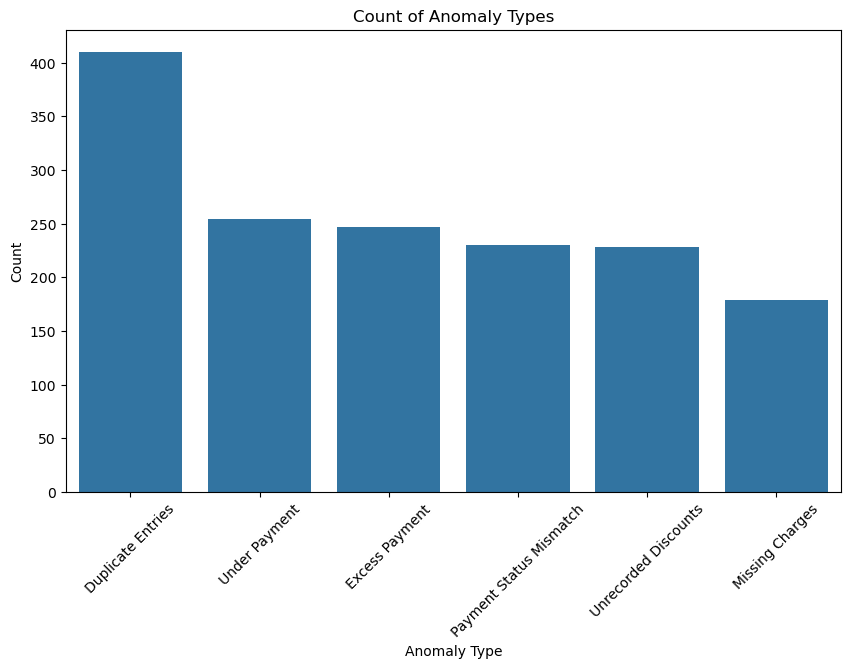

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=dfc, x='Anomaly_Type', order=dfc['Anomaly_Type'].value_counts().index)

plt.title("Count of Anomaly Types")
plt.xlabel("Anomaly Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


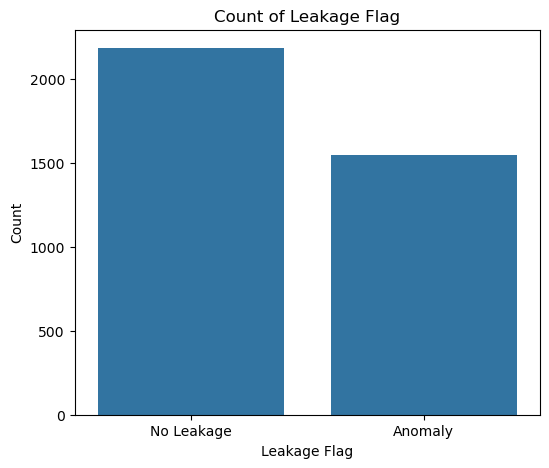

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.countplot(data=dfc, x='Leakage_Flag', order=dfc['Leakage_Flag'].value_counts().index)

plt.title("Count of Leakage Flag")
plt.xlabel("Leakage Flag")
plt.ylabel("Count")

# Rotate x labels if needed
plt.xticks(rotation=0)

plt.show()


In [48]:
dfc['Leakage_Flag'].value_counts()


Leakage_Flag
No Leakage    2184
Anomaly       1548
Name: count, dtype: int64

In [49]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = dfc[dfc['Leakage_Flag'] == 'No Leakage']
df_minority = dfc[dfc['Leakage_Flag'] == 'Anomaly']

# Downsample majority class to match minority
df_majority_downsampled = resample(
    df_majority,
    replace=False,                # without replacement
    n_samples=len(df_minority),   # match minority count
    random_state=42               # reproducibility
)

# Combine minority with downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Leakage_Flag'].value_counts())


Leakage_Flag
Anomaly       1548
No Leakage    1548
Name: count, dtype: int64


In [50]:
dfc.shape

(3732, 29)

In [51]:
# Save the balanced dataset to CSV
dfc.to_csv("revenue_leak_balanced.csv", index=False)
